# Principal Component Analysis with Cancer Data

In [78]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [4]:
bc_df=pd.read_csv("G:/Residency 5 - Internal Lab Assignment/breast-cancer-wisconsin-data.csv")
bc_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [5]:
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [0]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [86]:
bc_df=pd.read_csv("G:/Residency 5 - Internal Lab Assignment/breast-cancer-wisconsin-data.csv")
bc_df.drop(["ID"], axis = 1, inplace = True)
bc_df

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [0]:
# Datatypes of each column of the dataset.

In [87]:
bc_df.dtypes

ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [ ]:
# Finding the shape of the dataset.

In [88]:
bc_df.shape

(699, 10)

In [89]:
bc_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ClumpThickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [0]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [90]:
bc_df.isna().apply(pd.value_counts)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
False,699,699,699,699,699,699,699,699,699,699


In [91]:
print('Missing values:\n{}'.format(bc_df.isnull().sum()))

# Find duplicated records
print('\nNumber of duplicated records: {}'.format(bc_df.duplicated().sum()))

Missing values:
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

Number of duplicated records: 236


In [ ]:
# No missing values found. So let us try to remove ? from bare nuclei column


In [94]:
# Get count of rows having ?
bc_df.groupby('Bare Nuclei').size()

Bare Nuclei
1     402
10    132
2      30
3      28
4      19
5      30
6       4
7       8
8      21
9       9
?      16
dtype: int64

In [95]:
bc_df.isnull().sum()
bc_df.isna().sum()

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [0]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [96]:
bc_df.replace('?', np.nan, inplace=True)
bc_df.dropna(inplace=True)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [0]:
# Check for correlation of variable

In [97]:
corr = bc_df.corr()
corr

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.553742,0.534066,0.350957,0.714790
Cell Size,0.642481,1.000000,0.907228,0.706977,0.753544,0.755559,0.719346,0.460755,0.820801
Cell Shape,0.653470,0.907228,1.000000,0.685948,0.722462,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.668567,0.603121,0.418898,0.706294
Single Epithelial Cell Size,0.523596,0.753544,0.722462,0.594548,1.000000,0.618128,0.628926,0.480583,0.690958
Normal Nucleoli,0.553742,0.755559,0.735344,0.668567,0.618128,1.000000,0.665602,0.346011,0.758228
Bland Chromatin,0.534066,0.719346,0.717963,0.603121,0.628926,0.665602,1.000000,0.433757,0.718677
Mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.346011,0.433757,1.000000,0.423448
Class,0.714790,0.820801,0.821891,0.706294,0.690958,0.758228,0.718677,0.423448,1.000000


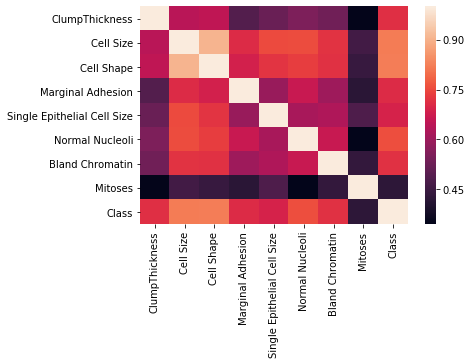

In [107]:
import seaborn as sns
sns.heatmap(bc_df.corr())

In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [108]:
print ('1. From the correlation heatmap, it is evident that Id is not correlated with target or any other variable, hence can be cropped form the dataset')
print ('2. Correlation is low between Target variable and Mitoses, still we will just keep it in our analysis. It coud be dropped too')
print ('3. Other variables have a good correlation with target variable-Class (Cell Size, Cell Shape, Bare Nuclei, Normal Nucleoli, Bland Chromatin, Clump Thickness, Marginal Adhesion and Single Epithelial Cell Size)')

1. From the correlation heatmap, it is evident that Id is not correlated with target or any other variable, hence can be cropped form the dataset
2. Correlation is low between Target variable and Mitoses, still we will just keep it in our analysis. It coud be dropped too
3. Other variables have a good correlation with target variable-Class (Cell Size, Cell Shape, Bare Nuclei, Normal Nucleoli, Bland Chromatin, Clump Thickness, Marginal Adhesion and Single Epithelial Cell Size)


In [0]:
#Let us check for pair plots

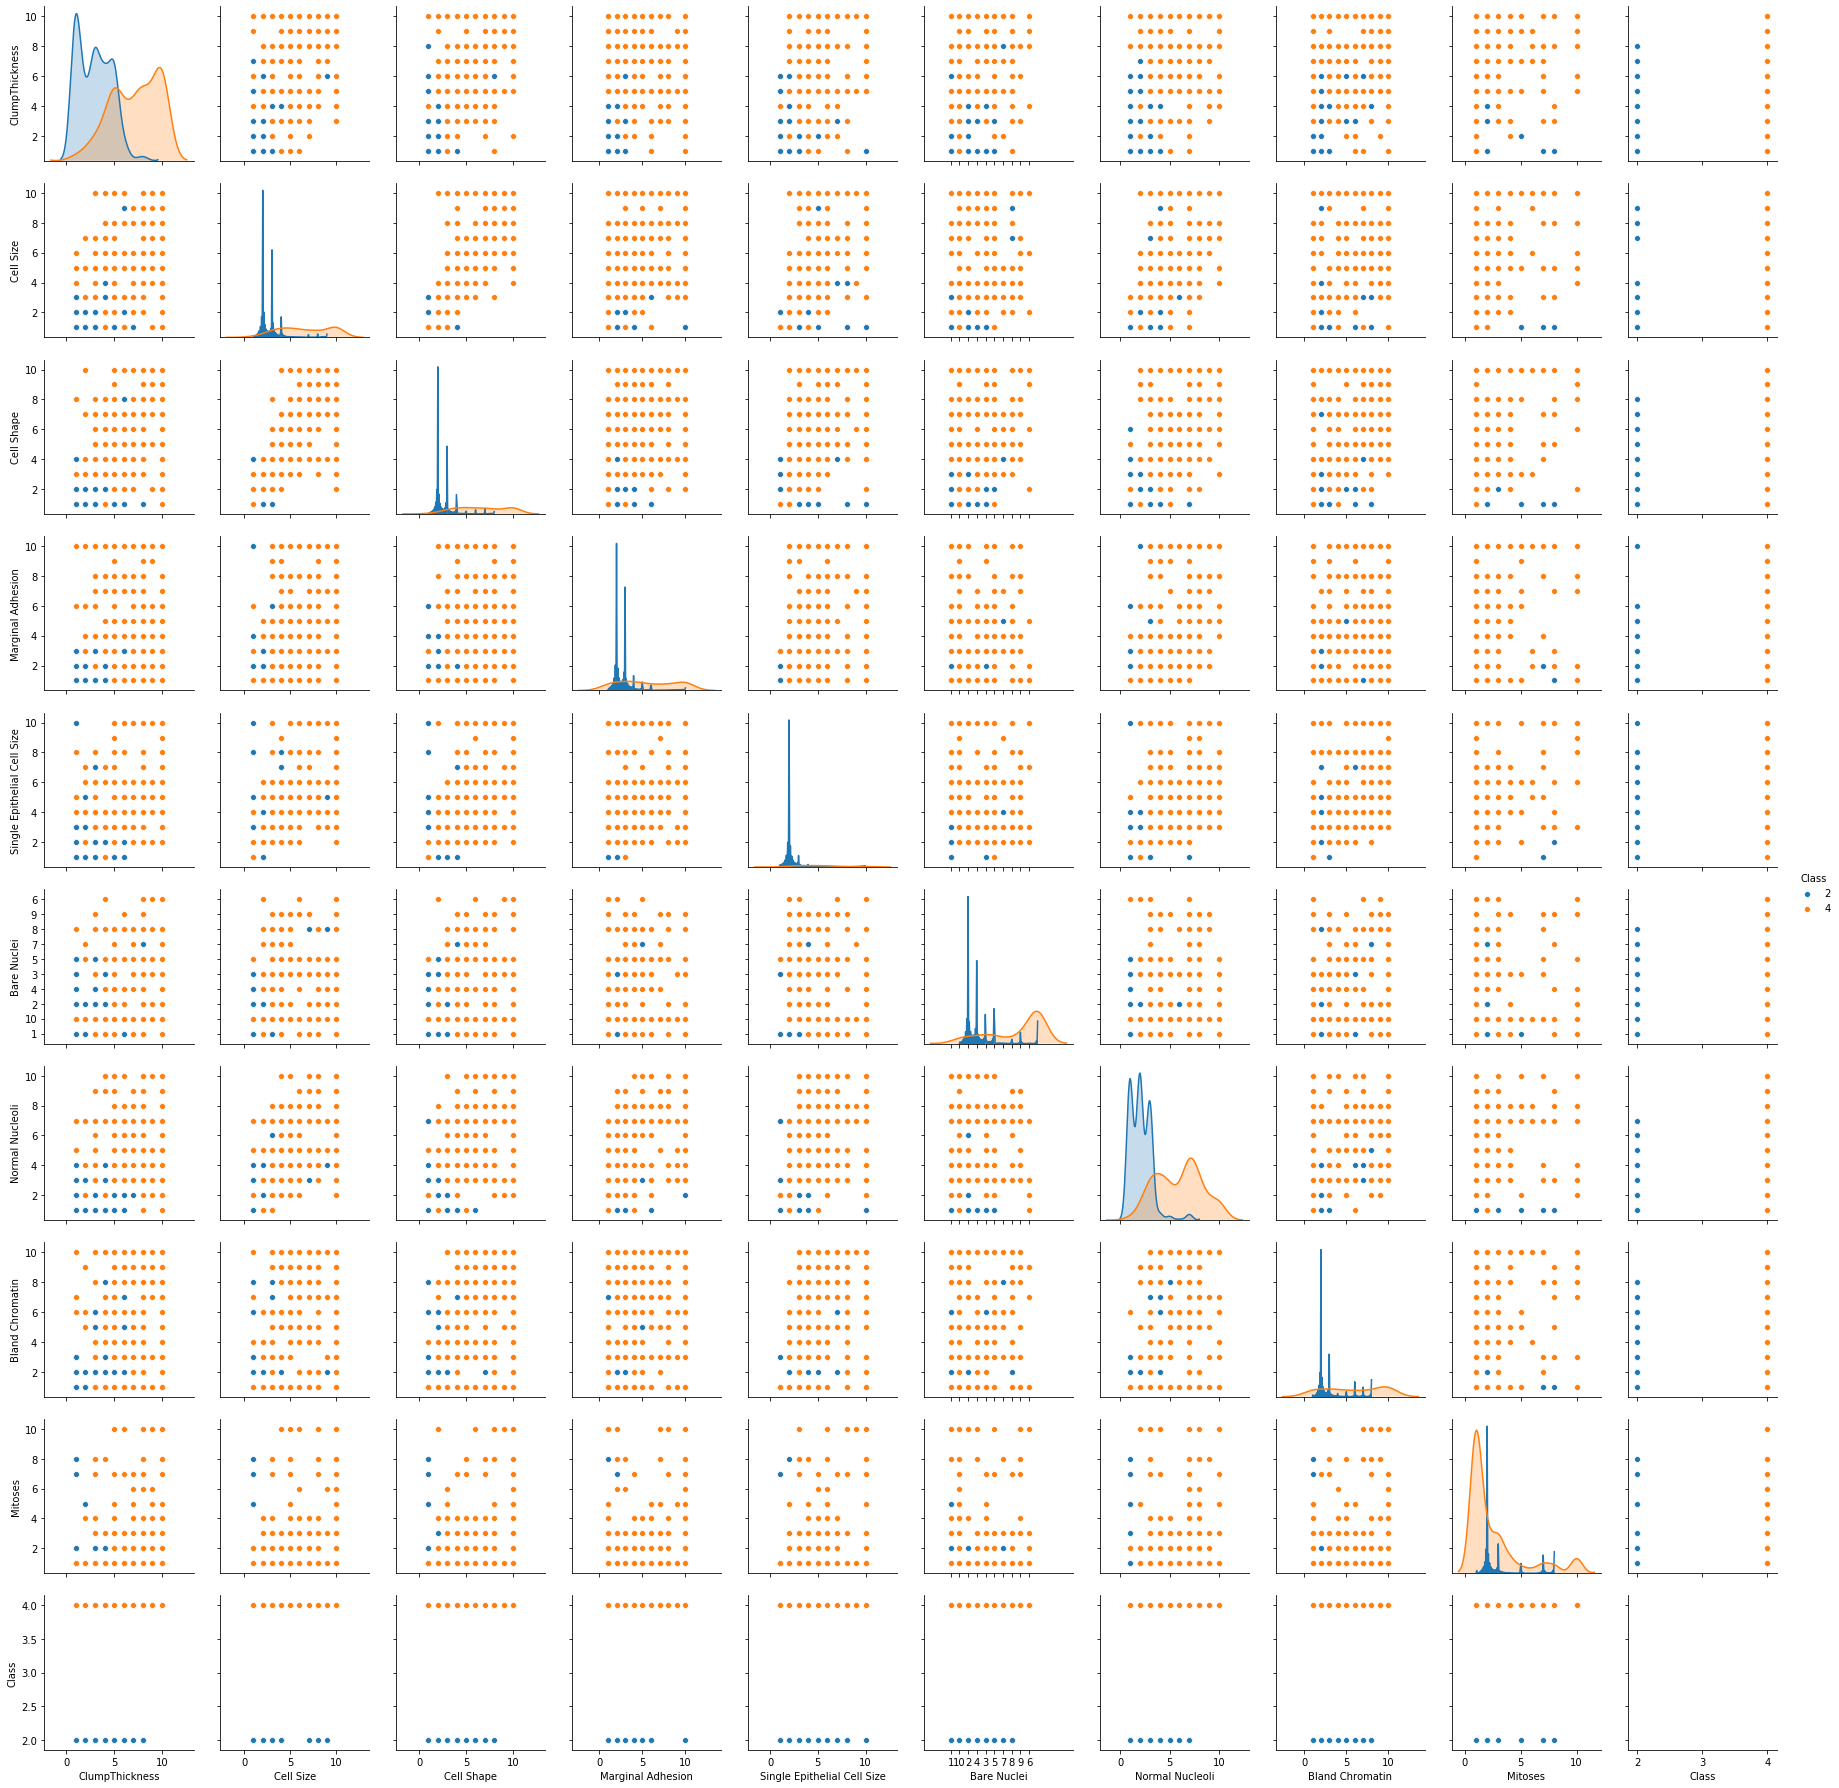

In [110]:
sns.pairplot(bc_df,hue ='Class')

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [0]:
# We could see most of the outliers are now removed.

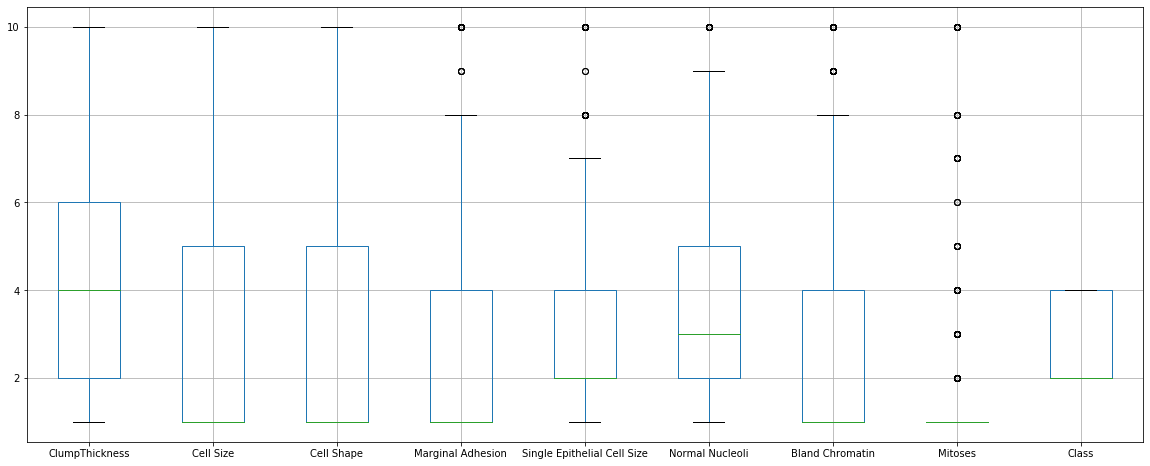

In [99]:
bc_df.boxplot(figsize=(20,8))

In [101]:
print ('It is evident that there are outliers available in fields Marginal Adhesion, Single Epithelial Cells, Normal Nucleoli, Bland Chromatin and Mitoses does have all the outliers. Hnce Mitoses variable can be dropped and remaining 4 variables need to be adjusted ')
print (pd.crosstab(bc_df['Marginal Adhesion'],bc_df['Class']))
print (pd.crosstab(bc_df['Single Epithelial Cell Size'],bc_df['Class']))
print (pd.crosstab(bc_df['Normal Nucleoli'],bc_df['Class']))
print (pd.crosstab(bc_df['Bland Chromatin'],bc_df['Class']))

It is evident that there are outliers available in fields Marginal Adhesion, Single Epithelial Cells, Normal Nucleoli, Bland Chromatin and Mitoses does have all the outliers. Hnce Mitoses variable can be dropped and remaining 4 variables need to be adjusted 
Class                2   4
Marginal Adhesion         
1                  363  30
2                   37  21
3                   31  27
4                    5  28
5                    4  19
6                    3  18
7                    0  13
8                    0  25
9                    0   4
10                   1  54
Class                          2   4
Single Epithelial Cell Size         
1                             43   1
2                            355  21
3                             28  43
4                              7  41
5                              5  34
6                              1  39
7                              2   9
8                              2  19
9                              0   2
10        

# Q6 Create a covariance matrix for identifying Principal components

In [102]:
# PCA
# Step 1 - Create covariance matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=bc_df.drop('Class',axis=1)
y=bc_df['Class']

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
x_train_std = sc.fit_transform(x_train)  # scale training and test data independently to prevent data leaks
x_test_std = sc.fit_transform(x_test)

In [104]:
cov_matrix = np.cov(x_train_std.T)

print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00209644 0.63708799 0.65172946 0.50812656 0.52538702 0.61119442
  0.55844692 0.55547734 0.3671125 ]
 [0.63708799 1.00209644 0.91953044 0.71334097 0.74988805 0.70912776
  0.76547682 0.74553313 0.49183739]
 [0.65172946 0.91953044 1.00209644 0.69416879 0.71343533 0.71979029
  0.7267583  0.73933368 0.47132642]
 [0.50812656 0.71334097 0.69416879 1.00209644 0.59380536 0.71787822
  0.67802576 0.60907472 0.39559972]
 [0.52538702 0.74988805 0.71343533 0.59380536 1.00209644 0.57763717
  0.61235036 0.67423325 0.50747731]
 [0.61119442 0.70912776 0.71979029 0.71787822 0.57763717 1.00209644
  0.67962079 0.57584992 0.36312955]
 [0.55844692 0.76547682 0.7267583  0.67802576 0.61235036 0.67962079
  1.00209644 0.68098983 0.35117209]
 [0.55547734 0.74553313 0.73933368 0.60907472 0.67423325 0.57584992
  0.68098983 1.00209644 0.44461649]
 [0.3671125  0.49183739 0.47132642 0.39559972 0.50747731 0.36312955
  0.35117209 0.44461649 1.00209644]]


# Q7 Identify eigen values and eigen vector

In [0]:
# Step 2- Get eigen values and eigen vector

In [106]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n%s', eig_vals)
print('Eigen Vectors \n%s', eig_vecs)


 Eigen Values 
%s [5.97819206 0.77870333 0.07686411 0.52952573 0.48941068 0.34289129
 0.25292375 0.2936256  0.27673137]
Eigen Vectors 
%s [[-0.30207621 -0.11722077  0.01736167 -0.8729151   0.17053691  0.02199364
   0.22523655 -0.19393326  0.12173284]
 [-0.38072333 -0.01675932  0.74001536  0.09045226  0.14149985 -0.07133585
   0.16946512  0.36641435 -0.33297989]
 [-0.37550869 -0.04268522 -0.65695525  0.01468932  0.14141877 -0.07338783
   0.07152267  0.36283325 -0.51304651]
 [-0.33297874 -0.185247   -0.02874011  0.25289699 -0.53749543 -0.03723745
   0.48915306 -0.495576   -0.12194901]
 [-0.33390922  0.22735849 -0.07019767  0.21289781  0.30524811 -0.70820224
   0.0053857  -0.12382818  0.4200837 ]
 [-0.33568264 -0.28064035  0.05716306 -0.13965768 -0.48028834 -0.18266332
  -0.71765769  0.0730035   0.03716755]
 [-0.34263486 -0.246828   -0.10031936  0.20815339  0.01926193  0.47027385
   0.14550425  0.36824265  0.62448605]
 [-0.33928713  0.05330197  0.03404477  0.20994295  0.45044479  0.42606

# Q8 Find variance and cumulative variance by each eigen vector

In [111]:
# Finding Variance and Cumulative Variance by each Eigen Vector
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 66.28539318  74.91955142  80.79086181  86.21738193  90.01931465
  93.27499594  96.34335636  99.14774109 100.        ]


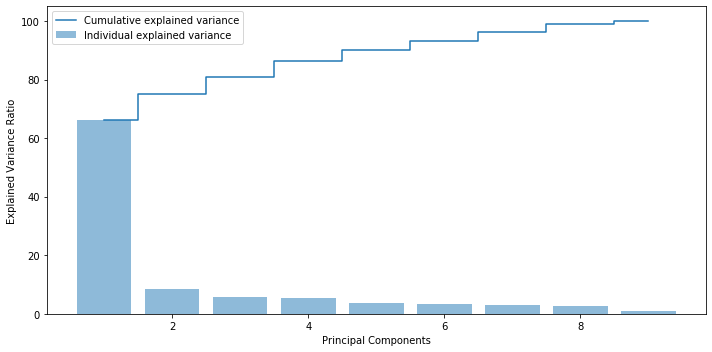

In [112]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [113]:
from sklearn.decomposition import PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)

In [0]:
explained_variance = pca.explained_variance_ratio_

In [115]:
li = list(bc_df).remove('Class')
print(li)

None


# Q10 Find correlation between components and features

In [117]:
bc_df_comp=pd.DataFrame(pca.components_,columns=list(x))
bc_df_comp.head(10)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.301915,0.403649,0.389201,0.333615,0.244476,0.445152,0.291799,0.352816,0.124838
1,-0.061550,0.222415,0.179464,-0.228441,0.235249,-0.729688,0.022595,0.496755,0.165190
2,-0.887733,0.056719,-0.011613,0.415996,0.062362,0.047749,0.141024,0.096976,-0.008046
3,-0.114036,0.413107,0.395492,-0.072652,0.216062,-0.094856,-0.206386,-0.696457,0.267056
4,0.314509,-0.105399,-0.174249,0.785582,-0.011109,-0.434466,-0.030675,-0.171755,0.152147
5,-0.044591,-0.243981,-0.226054,-0.015152,0.354365,0.258203,-0.503711,0.202411,0.632626
6,-0.019606,0.108694,0.364216,0.192150,-0.365172,0.023317,-0.734512,0.243528,-0.292435
7,0.047118,-0.046578,-0.115735,0.058135,0.749643,-0.002843,-0.196004,-0.051170,-0.613048
8,0.021829,0.727396,-0.657462,-0.022699,-0.115346,0.046224,-0.138811,0.043635,-0.032144


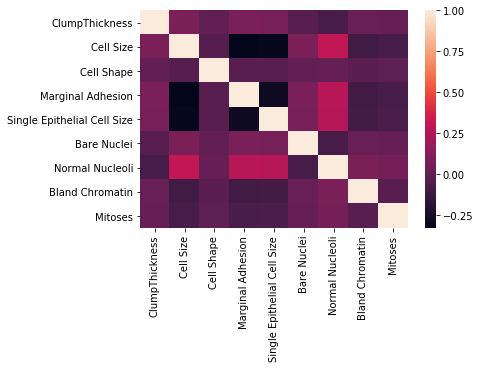

In [118]:
sns.heatmap(bc_df_comp.corr())

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [124]:
jok_df=pd.read_csv("G:/Residency 5 - Internal Lab Assignment/jokes.csv")
jok_df.head(10)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [125]:
ratings=jok_df.iloc[0:200,1:]
ratings.shape

(200, 100)

# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [126]:
#ratings.drop('NumJokes',axis=1,inplace=True)
ratings.replace(99.00,0,inplace=True)
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [133]:
ratings_df=ratings.mean()
ratings_df=pd.DataFrame(ratings_df)
ratings_df.head(10)

,0
Joke1,0.53005
Joke2,0.59390
Joke3,0.23765
Joke4,-0.70100
Joke5,-0.03790
Joke6,1.32005
Joke7,0.17150
Joke8,-0.08530
Joke9,0.01670
Joke10,0.89470


In [134]:
ratings_df.max()

0    4.0554
dtype: float64

In [135]:
ratings_df[0]

Joke1      0.53005
Joke2      0.59390
Joke3      0.23765
Joke4     -0.70100
Joke5     -0.03790
Joke6      1.32005
Joke7      0.17150
Joke8     -0.08530
Joke9      0.01670
Joke10     0.89470
Joke11     1.16675
Joke12     1.34195
Joke13    -1.34810
Joke14     1.96950
Joke15    -1.57630
Joke16    -2.85160
Joke17    -0.82600
Joke18    -0.74145
Joke19     0.30400
Joke20    -0.82725
Joke21     2.56045
Joke22     0.93365
Joke23     0.34435
Joke24    -1.09905
Joke25     0.56475
Joke26     1.15680
Joke27     3.05240
Joke28     1.15585
Joke29     3.18995
Joke30    -0.70215
            ...   
Joke71    -0.15430
Joke72     1.12100
Joke73     0.36100
Joke74    -0.40885
Joke75    -0.14515
Joke76     0.67045
Joke77     0.21805
Joke78     0.72365
Joke79     0.27445
Joke80     0.57735
Joke81     0.49335
Joke82     0.30125
Joke83     0.88235
Joke84     0.40525
Joke85     0.42435
Joke86     0.24565
Joke87     0.60490
Joke88     0.83650
Joke89     1.44285
Joke90    -0.34395
Joke91     0.56260
Joke92     0

In [136]:
ratings_df[0].sort_values(ascending=False).head(10)

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
Name: 0, dtype: float64